In [1]:
from pathlib import Path

from coml.agent import CoMLAgent, CodingAgent
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI


load_dotenv(Path("~/.mlcopilot/.env").expanduser())

llm = ChatOpenAI(temperature=0.)
coml_agent = CoMLAgent(llm)
agent = CodingAgent(llm, coml_agent, safe_mode=True)

/home/azureuser/miniconda3/envs/py310/lib/python3.10/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.6.14) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [2]:
spotify_filepath = "visdata/spotify.csv"

import pandas as pd

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
spotify_data

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0


In [4]:
agent("Draw a lineplot with dark theme.", spotify_data)

[2023-07-26 17:43:32] INFO (MainThread:coml.agent) (CodingAgent) System:
You're a data scientist. You're good at writing Python code to do data analysis, visualization, and machine learning. You can leverage the Python libraries such as `pandas`, `sklearn`, `matplotlib`, `seaborn`, and etc. to achieve user's request.

Specifically, the user will present a goal and optionally the data (e.g., pandas DataFrame) they already have, and several (around 3) suggestions from a machine learning expert. Your task is to write a Python function to solve the user's request, taking the given data as input and returning the goal as output. The suggestions from the machine learning expert are ordered from the most confident to least. They only serve as a reference and you don't have to use them all.

Some extra coding instructions:

- The function should be wrapped by ``` before and after it.
- Import necessary libraries at the start of the code.
- The Python function should be named as `_coml_solution

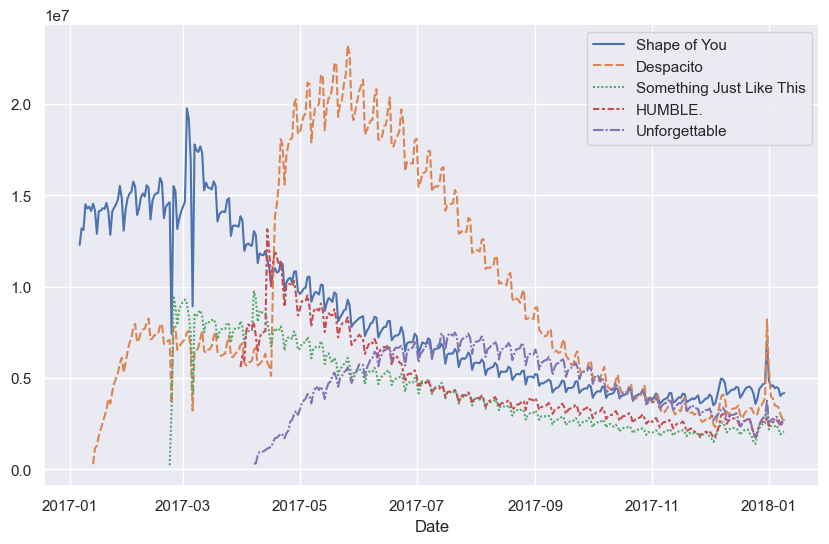

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def _coml_solution(df: pd.DataFrame) -> None:
    # Set dark theme
    sns.set_theme(style="darkgrid")

    # Create lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)

    # Show plot
    plt.show()

_coml_solution(spotify_data)